# Climate Data Analysis

## Imports
Basic imports that are required for analysis.

In [69]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Summary & Analysis

Please take a look at the data types and summary of our variables.


### 1.1 Data Types

In [70]:
# Reading CSV File
climateData = pd.read_csv('ClimateData.csv')

# Outputting Data types
climateData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


### 1.2 Summary

In [71]:
# Providing summary of the variables which includes count, mean, standard deviation, minimum, maximum, and quartiles
climateData.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


### 1.3 Head & Tail Analysis

In [72]:
climateData.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [73]:
climateData.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


## 2. FInding Unique Values
Summarize the number of unique values in each column.


In [74]:
# Prints all the unique number of values in the data set
climateData.nunique()

id                      75757
building_class              2
floor_area              20433
year_built                180
precipitation_inches      171
snowfall_inches            71
avg_temp                  173
days_with_fog              42
site_eui                17203
dtype: int64

## 3. Descriptive Statistics
 Check at descriptive statistics for the Dataset.


In [75]:
# Descriptive statistics is all about obtaining information about the data set
# # Based on our previous implementation from 1.2 Summary
climateData.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


## 4. Missing Values
 Check the number of missing values.

In [76]:
# We used .isnull() to check for missing values and .sum() to count the number of missing values
climateData.isnull().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

## 5. Fixing Missing Values
Take care of missing data. You can decide to remove or use the imputation.


In [77]:
climateData = climateData.dropna()
climateData.isnull().sum()

id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64

## 6. Finding & Removing Duplicates
Find and remove duplicate variables. 
 

### 6.1 Finding Duplicates

In [78]:
# searches for columns (variables) with duplicate data
duplicate_columns_climateData = climateData[climateData.duplicated()]
duplicate_columns_climateData

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui


In [79]:
# searches for rows with duplicate data
duplicate_rows_climateData = climateData[climateData.duplicated()]
duplicate_rows_climateData

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui


### 6.2 Removing Duplicates
Although based on the previous analysis, we don't have any duplicates, as such the removal script is created in case we have duplicates for other files if not limited to this file.

In [80]:
climateData = climateData.drop_duplicates()
climateData.duplicated().sum()

0

## 7. Encoding Categorical Variables
Encode the categorical variables; you can use label encoding, one hot encoding, or...

### 7.1. Label Encoding
Label encoding is a simple form of encoding. It assigns a unique integer to each unique value in a column.

In [97]:
# Columns of the data set
columns = ["building_class","floor_area","year_built","precipitation_inches","snowfall_inches","avg_temp","days_with_fog","site_eui"]

# label encoding
encoder = ce.OrdinalEncoder(cols=columns)

In [98]:
climateData_encoded = encoder.fit_transform(climateData)
climateData_encoded.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1,1,1,1,1,1,1,1,1,1
2,2,1,2,2,1,1,1,1,2
3,3,1,3,3,1,1,1,1,3
16,16,1,4,4,1,1,1,1,4
17,17,1,5,5,1,1,1,1,5


### 7.2. Inverse Transform 
Inverse transform is used to convert the encoded values back to their original form. 

From the previous steps of removing duplicates and missing values can also be observed from the head and tail of this data.


In [99]:
climateData_reversed = encoder.inverse_transform(climateData_encoded)
climateData_reversed.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
16,16,Commercial,74055.0,1949.0,16.59,0.0,56.972603,12.0,31.98
17,17,Commercial,128800.0,1926.0,16.59,0.0,56.972603,12.0,33.58


In [100]:
climateData_reversed.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
73151,73151,Residential,87458.0,1966.0,45.03,1.4,55.147541,261.0,96.64
73152,73152,Commercial,162157.0,2005.0,45.03,1.4,55.147541,261.0,249.78
73153,73153,Commercial,187027.0,2014.0,45.03,1.4,55.147541,261.0,24.43
73154,73154,Commercial,56988.0,2014.0,45.03,1.4,55.147541,261.0,9.52
73155,73155,Commercial,126604.0,2015.0,45.03,1.4,55.147541,261.0,39.32


## 8. Outliers
Create the boxplot and show the outlier.

### 8.1 Encoded Version
The encoded version provides an ambiguous result with how data is represented, due to which it is difficult to interpret the data. 

<AxesSubplot:>

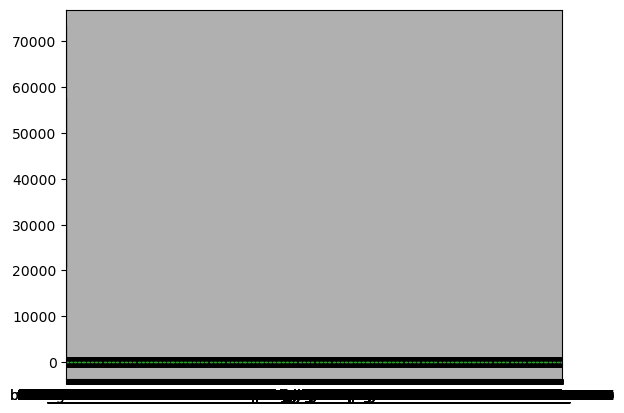

In [ ]:
# Outliers of encoded data
# climateData_encoded.boxplot() 

### 8.2 Non-encoded version

In [84]:
climateData.shape

(29400, 9)

In [ ]:
# Previous Function
# -----------------
# Was used for showing the boxplots of the data set for each column separately
# ----------------------------------------------------------------------------


# columns_with_id = ["id", "building_class","floor_area","year_built","precipitation_inches","snowfall_inches","avg_temp","days_with_fog","site_eui"]

# # creates boxplot for each numeric variable
# def create_boxplots(df):
#     for col in columns_with_id:
#     # checks if the column is numeric
#         if df[col].dtype == 'int64' or df[col].dtype == 'float64':
#             df.boxplot(column=[col], figsize=(2,2))
#             plt.show()
         
# create_boxplots(climateData_reversed)

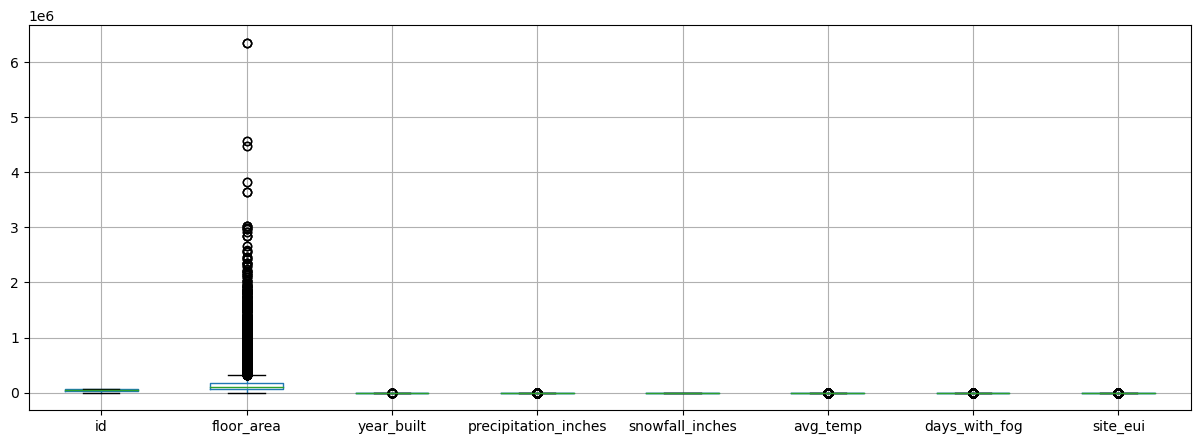

In [101]:
climateData.boxplot(figsize=(15,5))
plt.show()

### 8.3 Removing Outliner (Separate)

In [102]:
# removes outliers from all numeric columns
def remove_outliers(df):
    for col in columns:
        # checks if the column is numeric
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            # calculates summary statistics
            data_mean, data_std = np.mean(df[col]), np.std(df[col])
            # identifies outliers
            cut_off = data_std * 3
            lower, upper = data_mean - cut_off, data_mean + cut_off
            # removes outliers
            outliers = [x for x in df[col] if x < lower or x > upper]
            df = df[df[col].isin(outliers)==False]
    return df

climateData_removed_outliers = remove_outliers(climateData)
climateData.shape

(29400, 9)

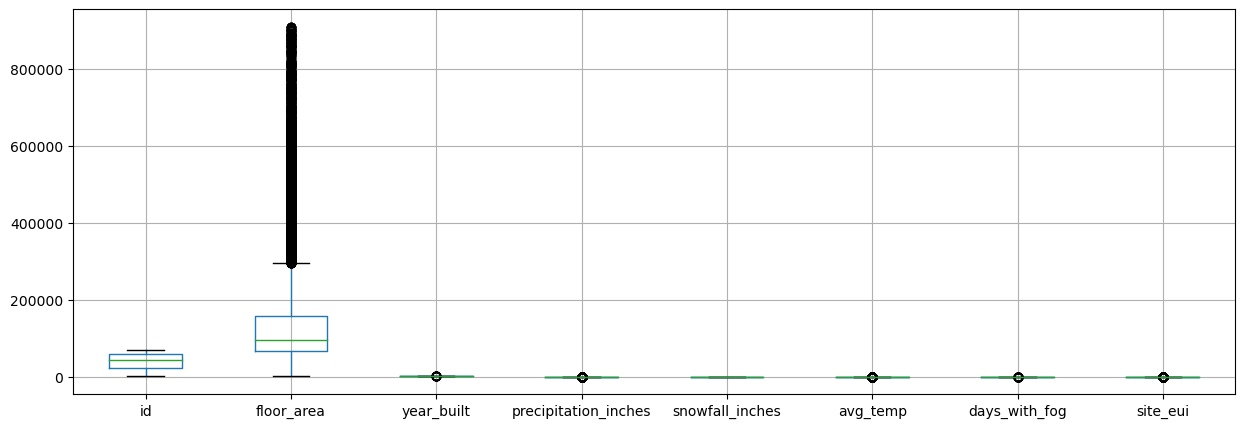

In [103]:
climateData_removed_outliers.boxplot(figsize=(15,5))
plt.show()

## 9. Histogram

### 9.1 With Outliers
From the graph, we can see that the data is not normally distributed and outliers are present.

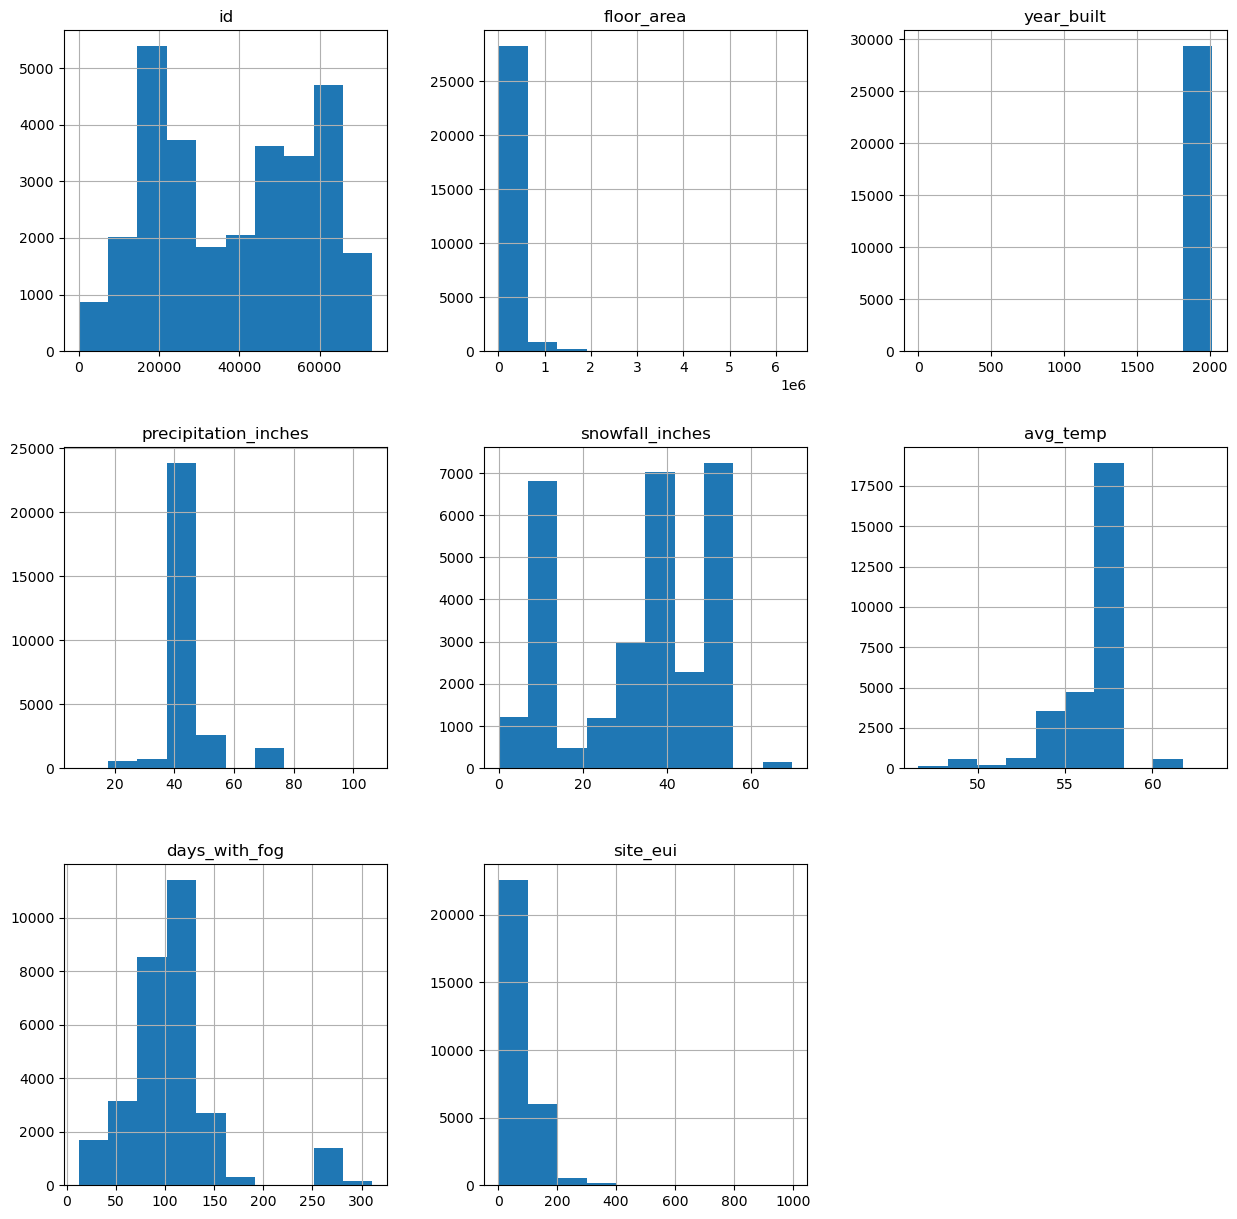

In [104]:
climateData.hist(figsize=(15, 15))
plt.show()

### 9.2 Without Outliers
The graph below in this one, the outliers are removed mostly and the rest would be fixed by the feature scaling.

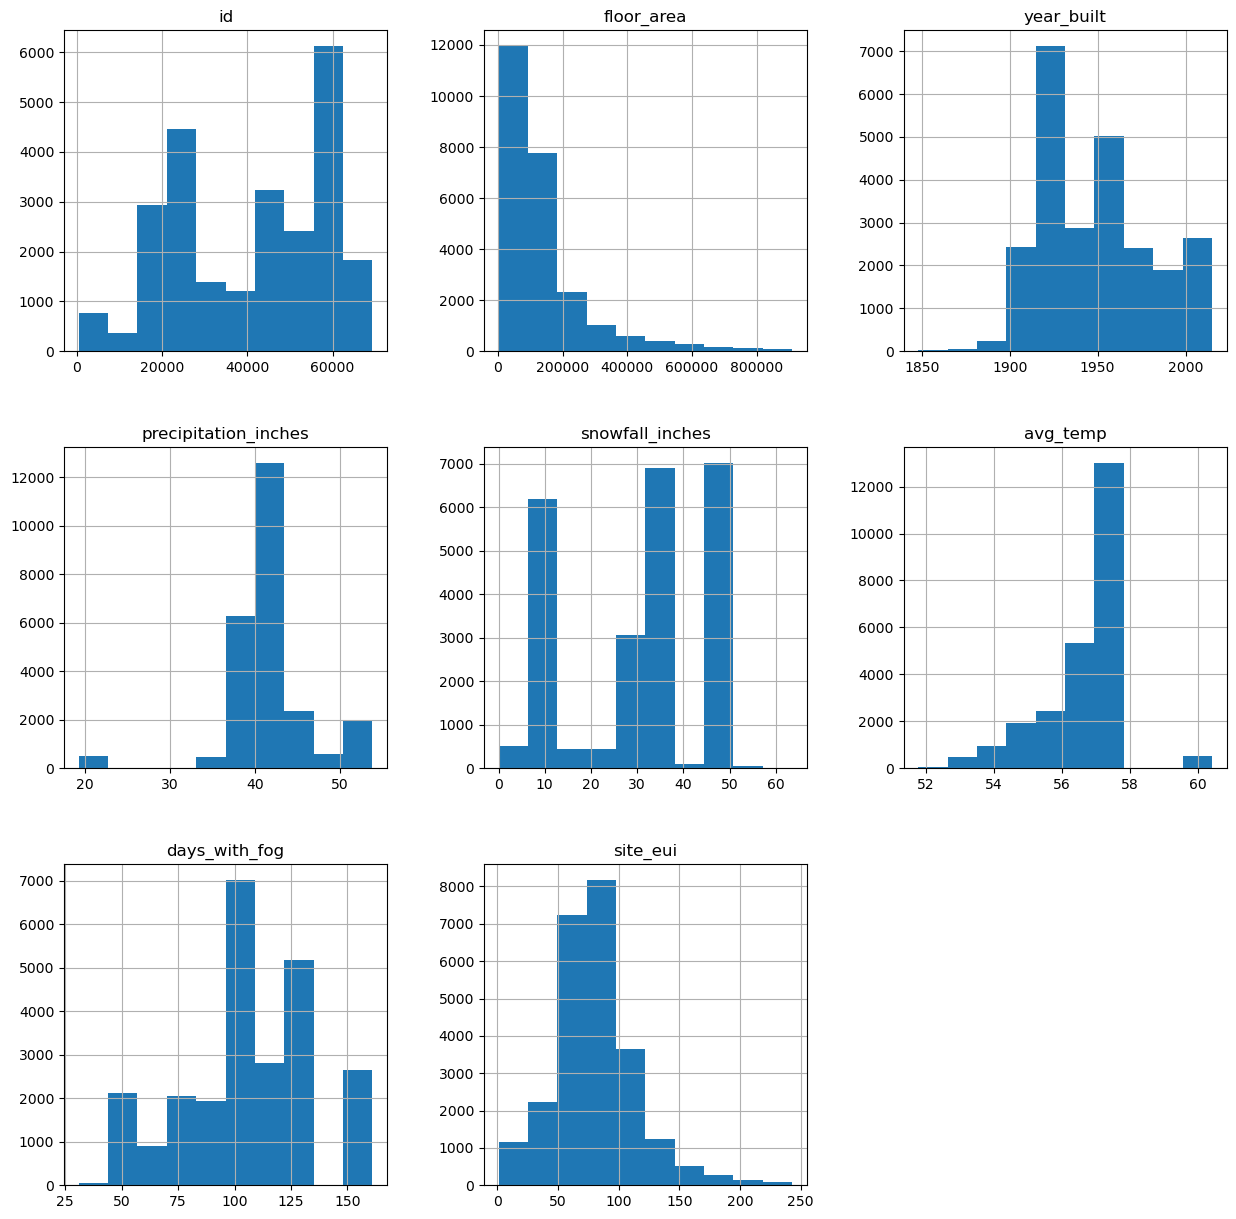

In [105]:
climateData_removed_outliers.hist(figsize=(15, 15))
plt.show()

## 10. Feature Scaling
If feature scaling is needed, do it, please.

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in columns:
    if climateData_removed_outliers[col].dtype == 'int64' or climateData_removed_outliers[col].dtype == 'float64':
        climateData_removed_outliers[col] = scaler.fit_transform(climateData_removed_outliers[[col]])

In [115]:
climateData_removed_outliers.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
404,404,Residential,-0.831982,-1.176421,-4.244389,-1.975658,2.864344,-0.661988,-1.823068
405,405,Commercial,-0.734602,-1.143924,-4.244389,-1.975658,2.864344,-0.661988,0.310471
406,406,Commercial,0.155476,-0.818952,-4.244389,-1.975658,2.864344,-0.661988,0.751487
407,407,Commercial,0.200098,-0.721460,-4.244389,-1.975658,2.864344,-0.661988,-0.434663
408,408,Commercial,0.905165,-1.208918,-4.244389,-1.975658,2.864344,-0.661988,0.659633


In [116]:
climateData_removed_outliers.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
69340,69340,Commercial,0.073613,0.448439,0.592604,-0.809106,2.884415,0.313987,-0.412877
69341,69341,Commercial,1.943692,0.253456,-1.909483,-0.560497,2.989889,0.013687,-0.521512
69342,69342,Commercial,0.547657,0.643423,-1.909483,-0.560497,2.989889,0.013687,-0.991968
69343,69343,Commercial,1.495653,1.130881,-1.909483,-0.560497,2.989889,0.013687,-0.649578
69344,69344,Commercial,0.073613,0.448439,-1.909483,-0.560497,2.989889,0.013687,-0.516802


### 10.1 Histogram
With the feature scaling, the data is now normally distributed and outliers have been removed from the data.

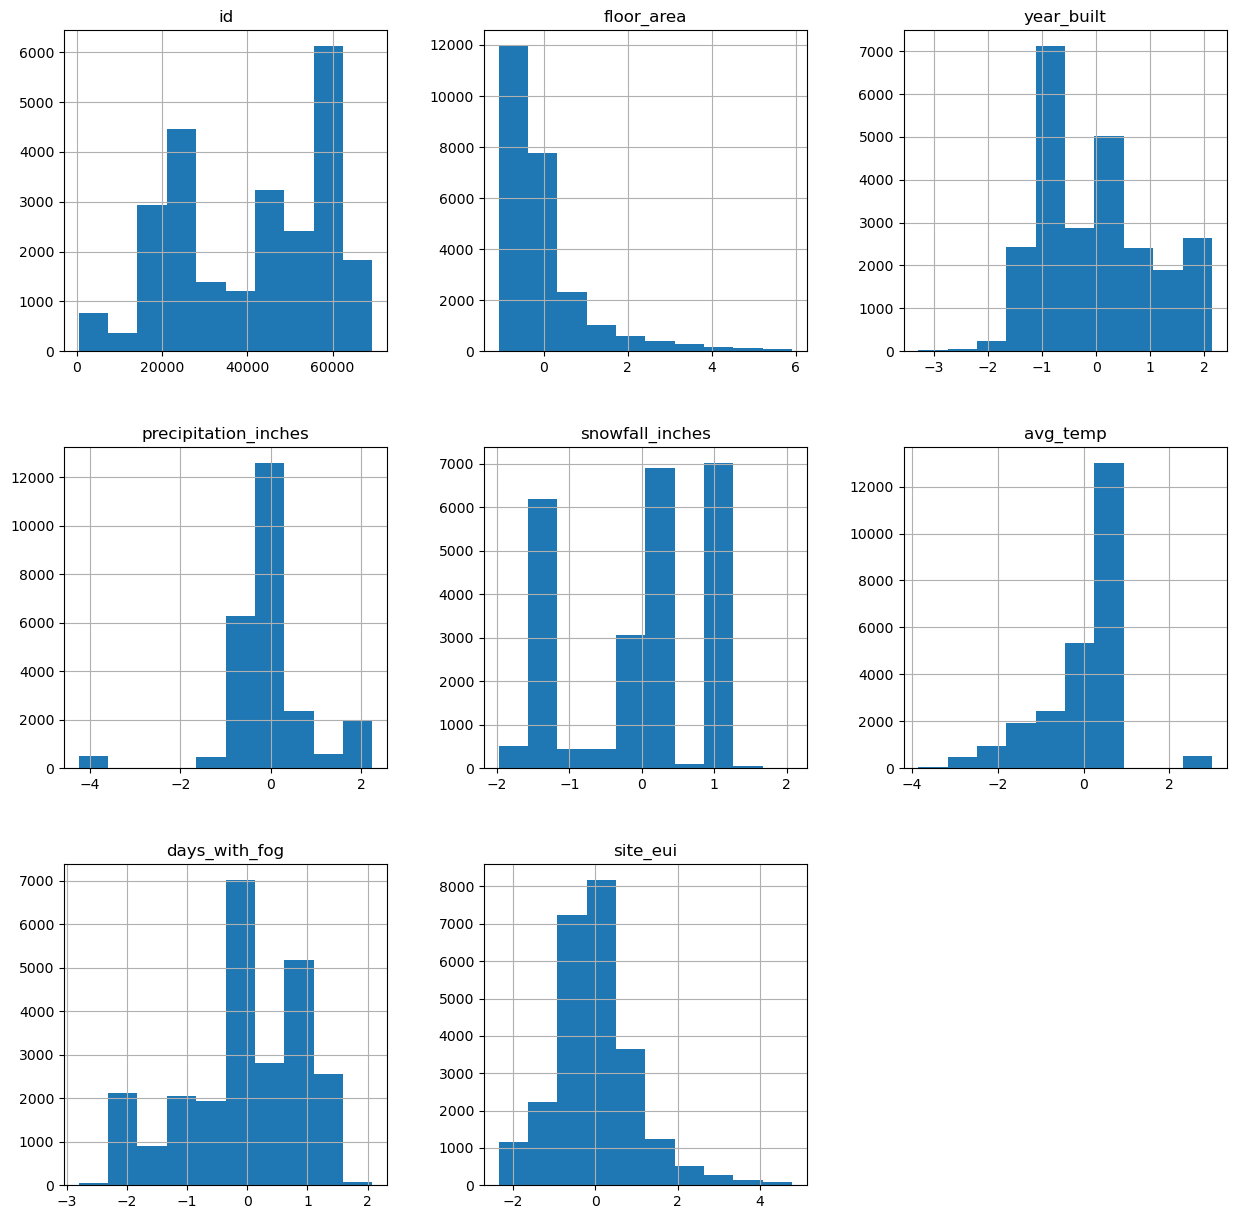

In [119]:
climateData_removed_outliers.hist(figsize=(15, 15))
plt.show()